In [1]:
TITANIC_DATASET_FILE = r"../data/titanic.csv"

In [2]:
import pandas as pd
import numpy as np
from pandas import Series, DataFrame
import matplotlib.pyplot as plt

In [3]:
raw_df = pd.read_csv(TITANIC_DATASET_FILE)
raw_df.set_index("PassengerId")
raw_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df = raw_df[['PassengerId','Survived','Pclass','Sex','Age','SibSp','Parch']]

In [5]:
def categorize_age(age):
    if (age < 10) : return 'CHILD'
    elif (age >= 10 and age < 20) : return 'YOUNG_ADULT'
    elif (age >= 20 and age < 35) : return 'YOUNG'
    elif (age >= 35 and age < 60) : return 'MIDDLE AGED'
    else : return 'SENIOR'

In [6]:
df['AgeGroup'] = df.apply(lambda p : categorize_age(p['Age']), axis = 1)
df.head()

C:\Users\Kaustubh\Anaconda3\lib\site-packages\ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """Entry point for launching an IPython kernel.


,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,AgeGroup
0,1,0,3,male,22.0,1,0,YOUNG
1,2,1,1,female,38.0,1,0,MIDDLE AGED
2,3,1,3,female,26.0,0,0,YOUNG
3,4,1,1,female,35.0,1,0,MIDDLE AGED
4,5,0,3,male,35.0,0,0,MIDDLE AGED


In [7]:
df = df.dropna()
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,AgeGroup
0,1,0,3,male,22.0,1,0,YOUNG
1,2,1,1,female,38.0,1,0,MIDDLE AGED
2,3,1,3,female,26.0,0,0,YOUNG
3,4,1,1,female,35.0,1,0,MIDDLE AGED
4,5,0,3,male,35.0,0,0,MIDDLE AGED


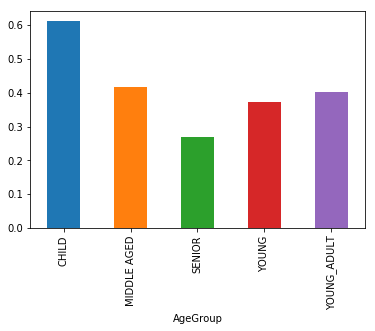

In [8]:
# Did age have an impact on Survival ?

grouped_by_age = df.groupby('AgeGroup').agg('mean')
grouped_by_age['Survived'].plot(kind = 'bar')

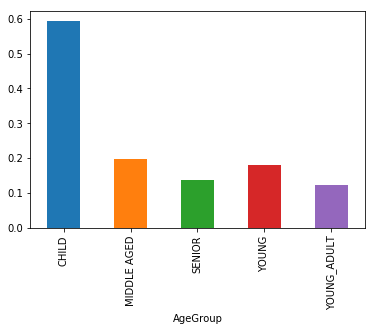

In [9]:
# for men
grouped_by_age = df[df['Sex']=='male'].groupby('AgeGroup').agg('mean')
grouped_by_age['Survived'].plot(kind = 'bar')


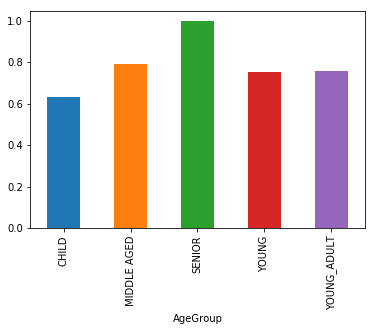

In [10]:
# for women
grouped_by_age = df[df['Sex']=='female'].groupby('AgeGroup').agg('mean')
grouped_by_age['Survived'].plot(kind = 'bar')

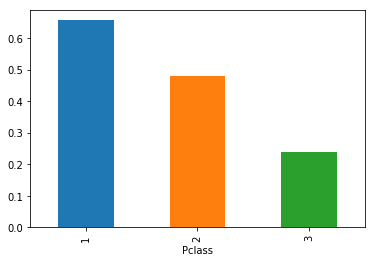

In [11]:
# Were first class passengers given priority in lifeboats ?

grouped_by_class = df.groupby('Pclass').agg('mean')
grouped_by_class['Survived'].plot(kind = 'bar')

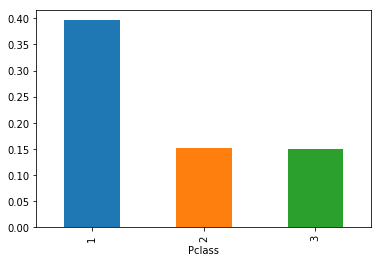

In [12]:
# for men
grouped_by_class = df[df['Sex']=='male'].groupby('Pclass').agg('mean')
grouped_by_class['Survived'].plot(kind = 'bar')

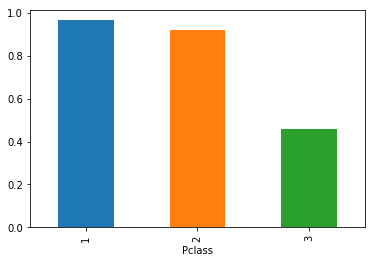

In [13]:
# for men
grouped_by_class = df[df['Sex']=='female'].groupby('Pclass').agg('mean')
grouped_by_class['Survived'].plot(kind = 'bar')

In [14]:
# did folks with children have a better chance of survival ?

def categorize_ppl (row) :
    if (row['AgeGroup'] == 'CHILD') : return 'CHILDREN'
    elif (row['Sex'] == 'male' and row['Parch'] == 0) : return 'MEN_WITHOUT_CHILDREN'
    elif (row['Sex'] == 'male' and row['Parch'] == 1) : return 'MEN_WITH_CHILDREN'
    elif (row['Sex'] == 'female' and row['Parch'] == 0) : return 'WOMEN_WITHOUT_CHILDREN'
    else : return 'WOMEN_WITH_CHILDREN'
df['CustomGroup'] = df.apply(lambda p : categorize_ppl(p), axis = 1)
df.head()

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,AgeGroup,CustomGroup
0,1,0,3,male,22.0,1,0,YOUNG,MEN_WITHOUT_CHILDREN
1,2,1,1,female,38.0,1,0,MIDDLE AGED,WOMEN_WITHOUT_CHILDREN
2,3,1,3,female,26.0,0,0,YOUNG,WOMEN_WITHOUT_CHILDREN
3,4,1,1,female,35.0,1,0,MIDDLE AGED,WOMEN_WITHOUT_CHILDREN
4,5,0,3,male,35.0,0,0,MIDDLE AGED,MEN_WITHOUT_CHILDREN


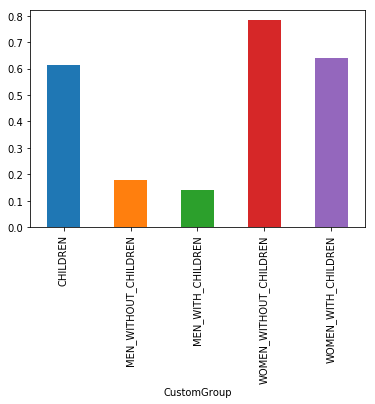

In [15]:
grouped_by = df.groupby('CustomGroup').agg('mean')
grouped_by['Survived'].plot(kind = 'bar')